In [175]:
import numpy as np
import pandas as pd
import os

In [176]:
Col = ["Code_Cis", "Denomination", "Forme_Pharma", "Voies_d'admin", "Statut_adm", "Type_Autor", "Commercialisee", "AMM", "Statut", "n_autor_euro", "Titulaire", "Surveillance_ranforcee"]
df = pd.read_csv("CIS_bdpm.csv", encoding="latin-1", header=None, sep="\t", names=Col)

In [177]:
Col_compo = ["Code_Cis", "Designation", "Code_element", "Nom_element", "dosage", "reference", "Nature_comp", "multiplier"]
df_compo = pd.read_csv("CIS_COMPO_bdpm.csv", encoding="latin-1", header=None, sep="\t", names=Col_compo)

In [178]:
Homeo = df_compo["Nom_element"].str.contains("HOMÉOPATHIQUE").astype(int)
df_compo["Homeo"]=Homeo

In [179]:
df_compo[["Code_Cis", "Code_element", "Nom_element", "Homeo"]]

,Code_Cis,Code_element,Nom_element,Homeo
0,60002283,42215,ANASTROZOLE,0
1,60002504,25783,RANITIDINE (CHLORHYDRATE DE),0
2,60002504,49632,RANITIDINE BASE,0
3,60002746,5319,ACTAEA RACEMOSA POUR PRÉPARATIONS HOMÉOPATHIQUES,1
4,60002746,5319,ACTAEA RACEMOSA POUR PRÉPARATIONS HOMÉOPATHIQUES,1
...,...,...,...,...
30877,69998996,3192,GLUCONATE DE CUIVRE,0
30878,69998996,3904,GLUCONATE DE MANGANÈSE,0
30879,69998996,5246,GLUCONATE DE ZINC,0
30880,69998996,30108,SÉLÉNITE DE SODIUM,0


In [180]:
df.head()

,Code_Cis,Denomination,Forme_Pharma,Voies_d'admin,Statut_adm,Type_Autor,Commercialisee,AMM,Statut,n_autor_euro,Titulaire,Surveillance_ranforcee
0,61266250,"A 313 200 000 UI POUR CENT, pommade",pommade,cutanée,Autorisation active,Procédure nationale,Commercialisée,12/03/1998,NaN,NaN,PHARMA DEVELOPPEMENT,Non
1,62869109,"A 313 50 000 U.I., capsule molle",capsule molle,orale,Autorisation active,Procédure nationale,Commercialisée,07/07/1997,NaN,NaN,PHARMA DEVELOPPEMENT,Non
2,61876780,"ABACAVIR ARROW 300 mg, comprimé pelliculé sécable",comprimé pelliculé sécable,orale,Autorisation active,Procédure décentralisée,Commercialisée,22/10/2019,NaN,NaN,ARROW GENERIQUES,Non
3,62401060,"ABACAVIR MYLAN 300 mg, comprimé pelliculé sécable",comprimé pelliculé sécable,orale,Autorisation active,Procédure décentralisée,Commercialisée,21/02/2018,NaN,NaN,MYLAN SAS,Non
4,63797011,"ABACAVIR SANDOZ 300 mg, comprimé pelliculé séc...",comprimé pelliculé sécable,orale,Autorisation active,Procédure décentralisée,Commercialisée,30/12/2016,NaN,NaN,SANDOZ,Non


Il n'est pas envisageable de faire du One-Hot-Encoding sur du texte.

Il est cependant possible de réduire l'éspace des champs ici.

In [181]:
df

,Code_Cis,Denomination,Forme_Pharma,Voies_d'admin,Statut_adm,Type_Autor,Commercialisee,AMM,Statut,n_autor_euro,Titulaire,Surveillance_ranforcee
0,61266250,"A 313 200 000 UI POUR CENT, pommade",pommade,cutanée,Autorisation active,Procédure nationale,Commercialisée,12/03/1998,NaN,NaN,PHARMA DEVELOPPEMENT,Non
1,62869109,"A 313 50 000 U.I., capsule molle",capsule molle,orale,Autorisation active,Procédure nationale,Commercialisée,07/07/1997,NaN,NaN,PHARMA DEVELOPPEMENT,Non
2,61876780,"ABACAVIR ARROW 300 mg, comprimé pelliculé sécable",comprimé pelliculé sécable,orale,Autorisation active,Procédure décentralisée,Commercialisée,22/10/2019,NaN,NaN,ARROW GENERIQUES,Non
3,62401060,"ABACAVIR MYLAN 300 mg, comprimé pelliculé sécable",comprimé pelliculé sécable,orale,Autorisation active,Procédure décentralisée,Commercialisée,21/02/2018,NaN,NaN,MYLAN SAS,Non
4,63797011,"ABACAVIR SANDOZ 300 mg, comprimé pelliculé séc...",comprimé pelliculé sécable,orale,Autorisation active,Procédure décentralisée,Commercialisée,30/12/2016,NaN,NaN,SANDOZ,Non
...,...,...,...,...,...,...,...,...,...,...,...,...
15308,67337081,"ZYTIGA 500 mg, comprimé",comprimé pelliculé,orale,Autorisation active,Procédure centralisée,Commercialisée,09/11/2016,NaN,EU/1/11/714,JANSSEN CILAG INTERNATIONAL NV,Non
15309,63095061,"ZYVOXID 100 mg/5 ml, granulés pour suspension ...",granulés pour suspension buvable,orale,Autorisation active,Procédure de reconnaissance mutuelle,Commercialisée,31/08/2001,NaN,NaN,PFIZER HOLDING FRANCE,Non
15310,63283095,"ZYVOXID 2 mg/ml, solution pour perfusion",solution pour perfusion,intraveineuse,Autorisation active,Procédure de reconnaissance mutuelle,Commercialisée,31/08/2001,NaN,NaN,PFIZER HOLDING FRANCE,Non
15311,68311278,"ZYVOXID 600 mg, comprimé pelliculé",comprimé pelliculé,orale,Autorisation active,Procédure de reconnaissance mutuelle,Commercialisée,31/08/2001,NaN,NaN,PFIZER HOLDING FRANCE,Non


In [192]:
#Jointure de deux tables (il en existe plus)

df_comb = df.merge(df_compo, how="inner")

In [193]:
df_comb

,Code_Cis,Denomination,Forme_Pharma,Voies_d'admin,Statut_adm,Type_Autor,Commercialisee,AMM,Statut,n_autor_euro,Titulaire,Surveillance_ranforcee,Designation,Code_element,Nom_element,dosage,reference,Nature_comp,multiplier,Homeo
0,61266250,"A 313 200 000 UI POUR CENT, pommade",pommade,cutanée,Autorisation active,Procédure nationale,Commercialisée,12/03/1998,NaN,NaN,PHARMA DEVELOPPEMENT,Non,pommade,77887,"CONCENTRAT DE VITAMINE A SYNTHÉTIQUE, FORME HU...",200 000 UI,100 g de pommade,SA,1.0,0
1,62869109,"A 313 50 000 U.I., capsule molle",capsule molle,orale,Autorisation active,Procédure nationale,Commercialisée,07/07/1997,NaN,NaN,PHARMA DEVELOPPEMENT,Non,capsule,77887,"CONCENTRAT DE VITAMINE A SYNTHÉTIQUE, FORME HU...",50 000 UI,une capsule,SA,1.0,0
2,61876780,"ABACAVIR ARROW 300 mg, comprimé pelliculé sécable",comprimé pelliculé sécable,orale,Autorisation active,Procédure décentralisée,Commercialisée,22/10/2019,NaN,NaN,ARROW GENERIQUES,Non,comprimé,31844,ABACAVIR,300 mg,un comprimé,FT,1.0,0
3,61876780,"ABACAVIR ARROW 300 mg, comprimé pelliculé sécable",comprimé pelliculé sécable,orale,Autorisation active,Procédure décentralisée,Commercialisée,22/10/2019,NaN,NaN,ARROW GENERIQUES,Non,comprimé,77742,SULFATE D'ABACAVIR,SA,1,NaN,NaN,0
4,62401060,"ABACAVIR MYLAN 300 mg, comprimé pelliculé sécable",comprimé pelliculé sécable,orale,Autorisation active,Procédure décentralisée,Commercialisée,21/02/2018,NaN,NaN,MYLAN SAS,Non,comprimé,31844,ABACAVIR,300 mg,un comprimé,SA,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30803,63095061,"ZYVOXID 100 mg/5 ml, granulés pour suspension ...",granulés pour suspension buvable,orale,Autorisation active,Procédure de reconnaissance mutuelle,Commercialisée,31/08/2001,NaN,NaN,PFIZER HOLDING FRANCE,Non,granulés,74148,LINÉZOLIDE,100 mg,5 ml de suspension reconstituée,SA,11.0,0
30804,63283095,"ZYVOXID 2 mg/ml, solution pour perfusion",solution pour perfusion,intraveineuse,Autorisation active,Procédure de reconnaissance mutuelle,Commercialisée,31/08/2001,NaN,NaN,PFIZER HOLDING FRANCE,Non,solution,74148,LINÉZOLIDE,2 mg,1 ml,SA,5.0,0
30805,68311278,"ZYVOXID 600 mg, comprimé pelliculé",comprimé pelliculé,orale,Autorisation active,Procédure de reconnaissance mutuelle,Commercialisée,31/08/2001,NaN,NaN,PFIZER HOLDING FRANCE,Non,comprimé,74148,LINÉZOLIDE,600 mg,un comprimé,SA,27.0,0
30806,67065998,"ÉZÉTIMIBE/SIMVASTATINE ALTER 10 mg/40 mg, comp...",comprimé,orale,Autorisation active,Procédure décentralisée,Commercialisée,24/10/2018,NaN,NaN,LABORATOIRES ALTER,Non,comprimé,10171,SIMVASTATINE,40 mg,un comprimé,SA,2.0,0


In [236]:
#Supprime les valeurs rares (pas d'interet pour former des groupes)

def cut_off (threshold, col_name, df):  
    
    criteria = int(len(df)*threshold)
    f_criteria = (df[col_name].value_counts().cumsum()<int(len(df)*threshold)).value_counts()[1]

    ax = df[col_name].value_counts().cumsum().plot()
    ax.axhline(criteria, color="red", linestyle="--")
    ax.axvline(f_criteria, color='red', linestyle="--")
    print("{}\n{}% cutoff\ny : {}\nx : {}".format(col_name,threshold*100, criteria, f_criteria))


Forme_Pharma
85.0% cutoff
y : 26186
x : 45


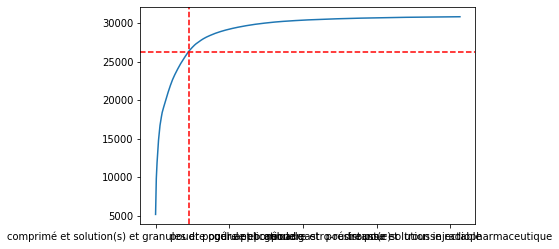

In [238]:
cut_off(0.85,"Forme_Pharma", df_comb)


45 Formes pharmaceutiques englobent 85% des médicaments

Nom_element
75.0% cutoff
y : 23106
x : 1124


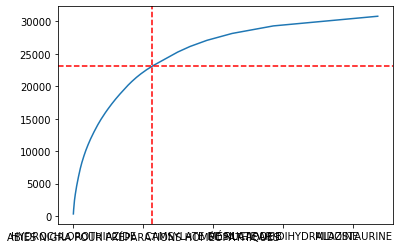

In [241]:
cut_off(0.75,"Nom_element", df_comb)

La distribution des principes actifs est beaucoup plus large que celle des autres éléments.

Voies_d'admin
95.0% cutoff
y : 29267
x : 15


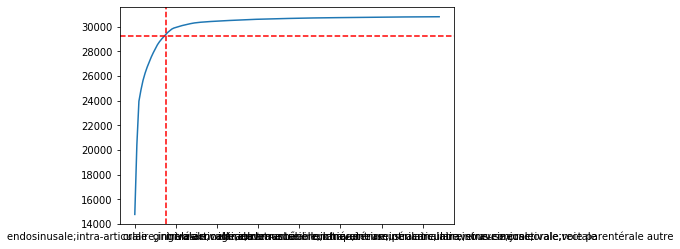

In [203]:
cut_off(0.95,"Voies_d'admin", df_comb)

Il semble exister 15 voies d'administration principales

Titulaire
90.0% cutoff
y : 27727
x : 154
Titulaire
50.0% cutoff
y : 15404
x : 12


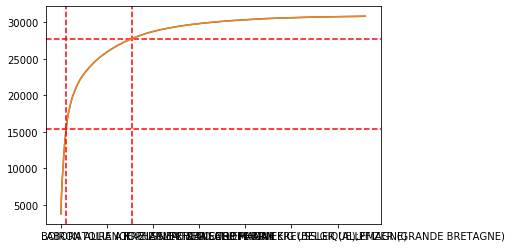

In [204]:
cut_off(0.9,"Titulaire",df_comb)
cut_off(0.5,"Titulaire",df_comb)

90% des médicaments sont attribués à 154 entreprises.
Les 12 plus gros titulaires représentent 50% des médicaments de la base.

In [206]:
(df["Forme_Pharma"].value_counts().cumsum()<int(15313*0.9)).head(63)

comprimé pelliculé                                           True
comprimé                                                     True
solution injectable                                          True
gélule                                                       True
comprimé et solution(s) et granules et poudre et pommade     True
                                                            ...  
solution injectable pour usage dentaire                      True
poudre pour solution injectable pour perfusion               True
émulsion pour perfusion                                      True
suspension pour pulvérisation                                True
crème et solution et granules et poudre et pommade          False
Name: Forme_Pharma, Length: 63, dtype: bool

Les formes retenues sont convenablement differentes, on a capturé les principales formes. Il existe une répétition des formes "solution" et "comprimé" sous différentes variantes.

In [249]:
#Il existe plusieurs formes de solutions et comprimés

Solution = df_comb["Forme_Pharma"].str.contains("solution").astype(int)
Comprimé = df_comb["Forme_Pharma"].str.contains("comprimé").astype(int)
df_comb["Comprime"]=Comprimé
df_comb["Solution"]=Solution

#Nom d'entrepise -> nombre de médicaments associés
df_comb["nombre"]=df_comb["Titulaire"].value_counts()[df_comb["Titulaire"]].values

In [252]:
#One Hot Encoding pour T-SNE
df_hot=pd.get_dummies(df_comb[["Forme_Pharma", "Voies_d'admin", "Statut_adm", "Type_Autor","Commercialisee", "Statut"]])

In [301]:
df_hot.head()

,Forme_Pharma_bain de bouche,Forme_Pharma_bâton pour application,Forme_Pharma_bâton pour usage dentaire,Forme_Pharma_bâton pour usage urétral,Forme_Pharma_capsule,Forme_Pharma_capsule molle,Forme_Pharma_capsule molle ou,Forme_Pharma_capsule pour inhalation par vapeur,Forme_Pharma_cartouche pour inhalation,Forme_Pharma_collutoire,...,Type_Autor_Enreg phyto (Proc. Dec.),Type_Autor_Enreg phyto (Proc. Nat.),Type_Autor_Procédure centralisée,Type_Autor_Procédure de reconnaissance mutuelle,Type_Autor_Procédure décentralisée,Type_Autor_Procédure nationale,Commercialisee_Commercialisée,Commercialisee_Non commercialisée,Statut_Alerte,Statut_Warning disponibilité
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


,Comprime,Solution,nombre
0,0,0,38
1,0,0,38
2,1,0,1147
3,1,0,1147
4,1,0,1398
...,...,...,...
30803,0,0,293
30804,0,1,293
30805,1,0,293
30806,1,0,96


In [276]:
df_viz=df_hot.join(df_comb[["Comprime", "Solution", "nombre"]])

In [277]:
from sklearn.manifold import TSNE

In [296]:
tsne = TSNE(perplexity=150, n_components=2, init="pca", n_iter=10000)

In [297]:
embeddings = tsne.fit_transform(df_viz.values[:10000,])

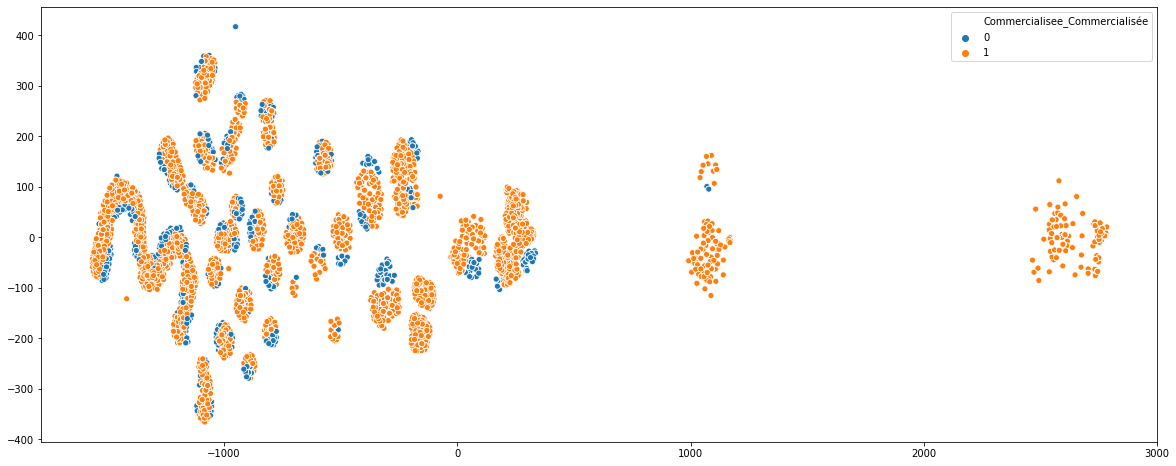

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 8))

palette = sns.color_palette("bright", 10)
sns.scatterplot(embeddings[:,0], embeddings[:,1], legend='full', hue=df_viz["Commercialisee_Commercialisée"][:10000])


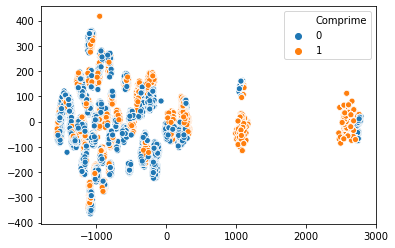

In [299]:
sns.scatterplot(embeddings[:,0], embeddings[:,1], legend='full', hue=df_viz["Comprime"][:10000])

In [78]:
embeddings

array([[-5.9889138e-01,  4.2035347e-03],
       [-2.9428419e-01, -9.2695571e-02],
       [-3.8712639e-01,  2.2029571e-02],
       [-2.9516444e-01, -8.8325687e-02],
       [-2.9516444e-01, -8.8325687e-02],
       [-2.9584754e-01, -8.5982017e-02],
       [-3.4623453e-01, -2.8750345e-01],
       [-2.9584754e-01, -8.5982017e-02],
       [-3.4623453e-01, -2.8750345e-01],
       [-3.4623453e-01, -2.8750345e-01],
       [-2.9584754e-01, -8.5982017e-02],
       [-2.9584754e-01, -8.5982017e-02],
       [-2.9584754e-01, -8.5982017e-02],
       [-6.0463935e-01, -5.1851862e-04],
       [-6.0463935e-01, -5.1851862e-04],
       [-6.2372291e-01, -1.8923854e-02],
       [-3.6257043e-01, -3.0102319e-01],
       [-3.6257043e-01, -3.0102319e-01],
       [-3.6257043e-01, -3.0102319e-01],
       [-3.6257043e-01, -3.0102319e-01],
       [-3.6257043e-01, -3.0102319e-01],
       [-6.7121369e-01, -2.2028393e-01],
       [-6.0479641e-01, -4.2873147e-04],
       [-6.7137468e-01, -2.1443829e-01],
       [-6.66159